In [8]:
import pandas as pd
import numpy as np

In [54]:
binary_score_converter = {"Yes": 1,
                          "No": 0}

In [2]:
data = pd.read_csv("..\csv_dataset\BindingDB_All_clean_parameters_categorical_FINALm.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\pkrys\AppData\Local\Temp\ipykernel_12180\2953608334.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv("..\csv_dataset\BindingDB_All_clean_parameters_categorical_FINALm.csv")


In [3]:
data

,Ligand SMILES,BindingDB Target Chain Sequence,IC50_nM_mean,Is_Above_Median,is_over_500
0,B.CP(c1ccccc1)c1ccc(O)cc1,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,2500.0,Yes,Yes
1,B.CP(c1ccccc1)c1ccc(O)cc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,9800.0,Yes,Yes
2,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,2000.0,Yes,Yes
3,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,12000.0,Yes,Yes
4,BB(B)B(B)B(B(B)B)B1CC1CNC(=O)[C@@H]1C[C@@H](F)...,MHSWERLAVLVLLGAAACAAPPRGRILGGREAEAHARPYMASVQLN...,1000.0,Yes,Yes
...,...,...,...,...,...
1549029,c1sc(nc1-c1cnc(nc1)-c1ccccc1)-c1cccnc1,MPNYKLTYFNMRGRAEIIRYIFAYLDIQYEDHRIEQADWPEIKSTL...,575.0,No,Yes
1549030,c1sc(nc1-c1nc2ccccc2s1)-c1ncccn1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,1000.0,Yes,Yes
1549031,c1sc2ncn3cnnc3c2c1-c1ccccc1,MGNAAAAKKGSEQESVKEFLAKAKEDFLKKWESPAQNTAHLDQFER...,19010.0,Yes,Yes
1549032,c1scc2c1ncc1cnccc21,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,15794.0,Yes,Yes


In [4]:
data["Ligand_len"] = data["Ligand SMILES"].apply(lambda x: len(x))
data["Target_Chain_len"] = data["BindingDB Target Chain Sequence"].apply(lambda x: len(x))

<Axes: >

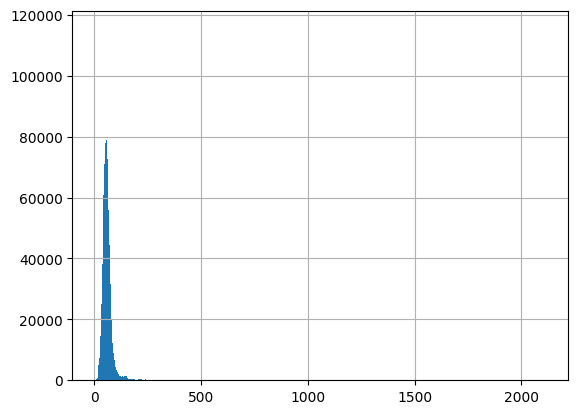

In [5]:
data.Ligand_len.hist(bins=1000)

In [6]:
data

,Ligand SMILES,BindingDB Target Chain Sequence,IC50_nM_mean,Is_Above_Median,is_over_500,Ligand_len,Target_Chain_len
0,B.CP(c1ccccc1)c1ccc(O)cc1,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,2500.0,Yes,Yes,25,530
1,B.CP(c1ccccc1)c1ccc(O)cc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,9800.0,Yes,Yes,25,595
2,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,2000.0,Yes,Yes,32,530
3,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,12000.0,Yes,Yes,32,595
4,BB(B)B(B)B(B(B)B)B1CC1CNC(=O)[C@@H]1C[C@@H](F)...,MHSWERLAVLVLLGAAACAAPPRGRILGGREAEAHARPYMASVQLN...,1000.0,Yes,Yes,90,253
...,...,...,...,...,...,...,...
1549029,c1sc(nc1-c1cnc(nc1)-c1ccccc1)-c1cccnc1,MPNYKLTYFNMRGRAEIIRYIFAYLDIQYEDHRIEQADWPEIKSTL...,575.0,No,Yes,38,199
1549030,c1sc(nc1-c1nc2ccccc2s1)-c1ncccn1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,1000.0,Yes,Yes,32,503
1549031,c1sc2ncn3cnnc3c2c1-c1ccccc1,MGNAAAAKKGSEQESVKEFLAKAKEDFLKKWESPAQNTAHLDQFER...,19010.0,Yes,Yes,27,351
1549032,c1scc2c1ncc1cnccc21,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,15794.0,Yes,Yes,19,1441


In [36]:
filtered_data = data[data.Target_Chain_len < 2048]

In [37]:
filtered_data

,Ligand SMILES,BindingDB Target Chain Sequence,IC50_nM_mean,Is_Above_Median,is_over_500,Ligand_len,Target_Chain_len
0,B.CP(c1ccccc1)c1ccc(O)cc1,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,2500.0,Yes,Yes,25,530
1,B.CP(c1ccccc1)c1ccc(O)cc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,9800.0,Yes,Yes,25,595
2,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,2000.0,Yes,Yes,32,530
3,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,12000.0,Yes,Yes,32,595
4,BB(B)B(B)B(B(B)B)B1CC1CNC(=O)[C@@H]1C[C@@H](F)...,MHSWERLAVLVLLGAAACAAPPRGRILGGREAEAHARPYMASVQLN...,1000.0,Yes,Yes,90,253
...,...,...,...,...,...,...,...
1549029,c1sc(nc1-c1cnc(nc1)-c1ccccc1)-c1cccnc1,MPNYKLTYFNMRGRAEIIRYIFAYLDIQYEDHRIEQADWPEIKSTL...,575.0,No,Yes,38,199
1549030,c1sc(nc1-c1nc2ccccc2s1)-c1ncccn1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,1000.0,Yes,Yes,32,503
1549031,c1sc2ncn3cnnc3c2c1-c1ccccc1,MGNAAAAKKGSEQESVKEFLAKAKEDFLKKWESPAQNTAHLDQFER...,19010.0,Yes,Yes,27,351
1549032,c1scc2c1ncc1cnccc21,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,15794.0,Yes,Yes,19,1441


In [56]:
filtered_data["logIC50"] = np.log10(filtered_data["IC50_nM_mean"] + 1e-6)
filtered_data["IAM"] = filtered_data["Is_Above_Median"].apply(lambda x: binary_score_converter[x])

C:\Users\pkrys\AppData\Local\Temp\ipykernel_12180\1622213552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["logIC50"] = np.log10(filtered_data["IC50_nM_mean"] + 1e-6)
C:\Users\pkrys\AppData\Local\Temp\ipykernel_12180\1622213552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["IAM"] = filtered_data["Is_Above_Median"].apply(lambda x: binary_score_converter[x])


In [57]:
max_ = filtered_data["logIC50"].max()
min_ = filtered_data["logIC50"].min()
filtered_data["logIC50_scaled"] = (filtered_data["logIC50"] - min_) / (max_ - min_)

C:\Users\pkrys\AppData\Local\Temp\ipykernel_12180\435679954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["logIC50_scaled"] = (filtered_data["logIC50"] - min_) / (max_ - min_)


In [58]:
filtered_data_to_save = filtered_data[["Ligand SMILES", "BindingDB Target Chain Sequence", "IAM", "logIC50_scaled"]]

In [59]:
filtered_data_to_save.rename(columns={"Ligand SMILES": "Ligand",
                                      "BindingDB Target Chain Sequence": "Target_Chain",
                                      },
                            inplace=True)

C:\Users\pkrys\AppData\Local\Temp\ipykernel_12180\2020194471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_to_save.rename(columns={"Ligand SMILES": "Ligand",


In [50]:
max_

np.float64(13.999999999999996)

In [51]:
min_

np.float64(-6.0)

In [62]:
filtered_data_to_save.to_csv(f"../csv_dataset/filtered_binding_finalm.csv", header=True, index=False)

In [47]:
min_

np.float64(-6.0)

In [48]:
max_

np.float64(13.999999999999996)

In [7]:
filtered_data = data

In [8]:
import sentencepiece as spm

In [9]:
def iter_pipeline(text):
    for line in text:
        line = line.rstrip()
        yield line

In [11]:
spm.SentencePieceTrainer.train(sentence_iterator=iter_pipeline(filtered_data["Target_Chain"]), model_prefix="test_model",
                                   vocab_size=128, character_coverage=1.0, model_type='bpe')

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input_format: 
  model_prefix: test_model
  model_type: BPE
  vocab_size: 128
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_privacy_noise_level: 0

In [12]:
encoder = spm.SentencePieceProcessor(model_file="test_model.model")

In [16]:
filtered_data.loc[1].Target_Chain[:30]

'PISPITVPVKLKPGMDGPKVKQWPLTEEKI'

In [41]:
"|".join([ str(c) for c in encoder.encode('PISPITVPVKLKPGMDGPKVKQWPLTEEKI')])

'95|81|38|81|85|30|49|82|11|33|92|52|81|51|82|88|94|81|15|5|45'

In [25]:
"|".join([ str(c) for c in encoder.encode_as_pieces('PISPITVPVKLKPGMDGPKVKQWPLTEEKI')])

'▁|P|IS|P|I|TV|PV|K|LK|PG|M|DG|P|KV|K|Q|W|P|LT|EE|KI'

In [43]:
encoder.encode("LT")

[95, 15]

In [34]:
import torch

In [41]:
input_sequence = torch.Tensor(encoder.encode('BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O')).int()

In [42]:
embedding_layer = torch.nn.Embedding(128, 128)

In [44]:
embedding_layer(input_sequence).size()

torch.Size([33, 128])

In [47]:
encoder.encode('cc')

[83, 3]

In [48]:
torch.nn.utils.rnn.pack_sequence([encoder.encode('BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O')])

AttributeError: 'list' object has no attribute 'size'

In [49]:
data

,Ligand,Target_Chain,IC50,Ligand_len,Target_Chain_len
0,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,yes,32,595
1,BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,yes,47,254
2,BP(=O)(CO[C@H](C)Cn1cnc2c(N)ncnc12)OP(O)(=O)OP...,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,yes,54,254
3,Bc1cc(Cl)ccc1COc1ccnn1-c1cc(ccn1)C(O)=O,MEAATTLHPGPRPALPLGGPGPLGEFLPPPECPVFEPSWEEFADPF...,no,39,1544
4,Bc1ccc(F)c2[C@@H](CCc12)Nc1ccc(nc1)[C@H]1C[C@@...,MDSLVVLVLCLSCLLLLSLWRQSSGRGKLPPGPTPLPVIGNILQIG...,yes,55,490
...,...,...,...,...,...
533943,c1sc(nc1-c1cccnc1)-c1cccnc1,MVSSQKLEKPIEMGSSEPLPIADGDRRRKKKRRGRATDSLPGKFED...,yes,27,465
533944,c1sc(nc1-c1cccnc1)-c1ccncc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,no,27,503
533945,c1sc(nc1-c1cnc(nc1)-c1ccccc1)-c1ccccc1,MPNYKLTYFNMRGRAEIIRYIFAYLDIQYEDHRIEQADWPEIKSTL...,yes,38,199
533946,c1sc2ncn3cnnc3c2c1-c1ccccc1,MGNAAAAKKGSEQESVKEFLAKAKEDFLKKWESPAQNTAHLDQFER...,yes,27,351


In [50]:
data.head(10).to_json("test.json")

,Ligand,Target_Chain,IC50,Ligand_len,Target_Chain_len
0,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,yes,32,595
1,BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,yes,47,254
2,BP(=O)(CO[C@H](C)Cn1cnc2c(N)ncnc12)OP(O)(=O)OP...,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,yes,54,254
3,Bc1cc(Cl)ccc1COc1ccnn1-c1cc(ccn1)C(O)=O,MEAATTLHPGPRPALPLGGPGPLGEFLPPPECPVFEPSWEEFADPF...,no,39,1544
4,Bc1ccc(F)c2[C@@H](CCc12)Nc1ccc(nc1)[C@H]1C[C@@...,MDSLVVLVLCLSCLLLLSLWRQSSGRGKLPPGPTPLPVIGNILQIG...,yes,55,490
5,Bc1ccc(F)c2[C@@H](CCc12)Nc1ccc(nc1)[C@H]1C[C@@...,MEPFVVLVLCLSFMLLFSLWRQSCRRRKLPPGPTPLPIIGNMLQID...,yes,55,490
6,Br.Br.Br.NC(=N)SCc1cc(CSC(N)=N)c(Br)c(CSC(N)=N...,MEAAHSKSTEECLAYFGVSETTGLTPDQVKRHLEKYGHNELPAEEG...,yes,51,1001
7,Br.BrCC1CN=C(NCc2ccccc2)S1,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,yes,26,574
8,Br.BrCC1CN=C(NCc2ccccc2)S1,MWLLPLVLTSLASSATWAGQPASPPVVDTAQGRVLGKYVSLEGLAQ...,yes,26,566
9,Br.BrCC1CN=C(Nc2ccccc2)S1,MWLLPLVLTSLASSATWAGQPASPPVVDTAQGRVLGKYVSLEGLAQ...,yes,25,566


In [53]:
data.sample(frac=0.2, weights=data.Target_Chain_len)

,Ligand,Target_Chain,IC50,Ligand_len,Target_Chain_len
418787,Fc1ccc(NS(=O)(=O)c2c(F)cc(NCc3c(F)cccc3CN3CCC3...,MANFLLPRGTSSFRRFTRESLAAIEKRMAEKQARGSTTLQESREGL...,yes,55,2016
532514,[O-][N+](=O)c1cccc2C(=O)C(Nc3ccccc3)=C(NS(=O)(...,MDIEAYFERIGYQSTRSKLDLKTLTEILQHQIRAIPFENLNIHCGE...,yes,66,290
508257,ONC(=O)C1Cc2ccccc2CN1S(=O)(=O)c1ccc(OCc2ccc(F)...,MFSLKTLPFLLLLHVQISKAFPVSSKEKNTKTVQDYLEKFYQLPSN...,no,53,467
165346,CN(CCO)c1ncc(cc1N1CCOCC1)-c1cc(NC(=O)c2cccc(c2...,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,no,61,766
231776,COc1cc(ccc1C(=O)N[C@H](CO)c1cccc(c1)C(=O)NC1CC...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,no,61,1388
...,...,...,...,...,...
186523,CNC(=O)c1cccc(CNC(=O)c2ccc-3c(c2)C(C)Oc2cnccc-...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,no,51,1388
517292,Oc1cc(CNC=C2C(=O)NC(=O)c3ccc(I)cc23)ccc1-c1ccoc1,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,yes,48,536
457094,Nc1n[nH]cc1-c1cc(Cl)ccc1Oc1cc(F)c(cc1F)S(=O)(=...,MAMLPPPGPQSFVHFTKQSLALIEQRIAERKSKEPKEEKKDDDEEA...,no,56,1988
237879,COc1cc2c(NCC3CCN(CC3)c3ncc(cn3)C(=O)NO)cc(C)nc...,MAAAAGAAAAAAAEGEAPAEMGALLLEKETRGATERVHGSLGDTPR...,no,61,1210


In [56]:
weight = 1 / data.groupby('Target_Chain_len')['Target_Chain_len'].transform('count')

array([[<Axes: title={'center': 'Ligand_len'}>,
        <Axes: title={'center': 'Target_Chain_len'}>]], dtype=object)

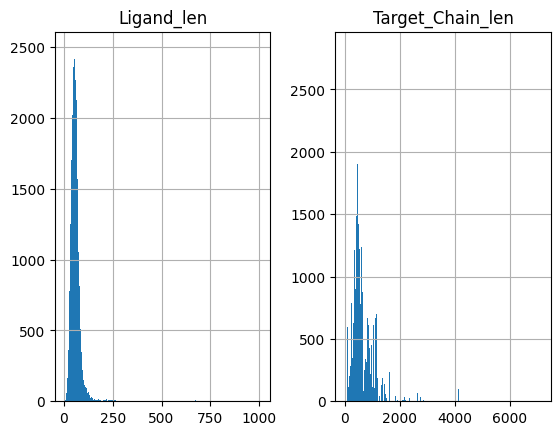

In [63]:
data.sample(frac=0.2).hist(bins=1000)

array([[<Axes: title={'center': 'Ligand_len'}>,
        <Axes: title={'center': 'Target_Chain_len'}>]], dtype=object)

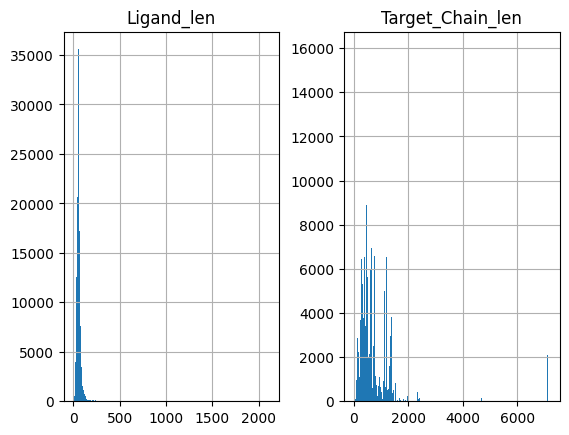

In [64]:
data.hist(bins=1000)

In [ ]:
train_data = data.sample(frac=0.7)
test_val_data = data[train_data]

In [65]:
import numpy as np

In [66]:
train, validate, test = \
              np.split(data.sample(frac=1, random_state=42), 
                       [int(.6*len(data)), int(.8*len(data))])

/home/bombus/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [67]:
len(train)

320368

In [ ]:
def train_validate_test_split(df, train_percent=.7, validate_percent=.2, seed=None):
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [69]:
from torch.utils.data import DataLoader

In [73]:
data

,Ligand,Target_Chain,IC50,Ligand_len,Target_Chain_len
0,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,yes,32,595
1,BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,yes,47,254
2,BP(=O)(CO[C@H](C)Cn1cnc2c(N)ncnc12)OP(O)(=O)OP...,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,yes,54,254
3,Bc1cc(Cl)ccc1COc1ccnn1-c1cc(ccn1)C(O)=O,MEAATTLHPGPRPALPLGGPGPLGEFLPPPECPVFEPSWEEFADPF...,no,39,1544
4,Bc1ccc(F)c2[C@@H](CCc12)Nc1ccc(nc1)[C@H]1C[C@@...,MDSLVVLVLCLSCLLLLSLWRQSSGRGKLPPGPTPLPVIGNILQIG...,yes,55,490
...,...,...,...,...,...
533943,c1sc(nc1-c1cccnc1)-c1cccnc1,MVSSQKLEKPIEMGSSEPLPIADGDRRRKKKRRGRATDSLPGKFED...,yes,27,465
533944,c1sc(nc1-c1cccnc1)-c1ccncc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,no,27,503
533945,c1sc(nc1-c1cnc(nc1)-c1ccccc1)-c1ccccc1,MPNYKLTYFNMRGRAEIIRYIFAYLDIQYEDHRIEQADWPEIKSTL...,yes,38,199
533946,c1sc2ncn3cnnc3c2c1-c1ccccc1,MGNAAAAKKGSEQESVKEFLAKAKEDFLKKWESPAQNTAHLDQFER...,yes,27,351


In [76]:
dl = DataLoader((np.array(data["Ligand"]), np.array(data["Target_Chain"]), np.array(data["IC50"])), batch_size=2, shuffle=True)

In [77]:
next(iter(dl))

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found object

In [85]:
a = DataLoader([[1,0],[2,0],[3,0],[4,0],[5,0]], batch_size=2)

In [86]:
next(iter(a))

[tensor([1, 2]), tensor([0, 0])]

In [ ]:
torch.

array(['B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1',
       'BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O',
       'BP(=O)(CO[C@H](C)Cn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O', ...,
       'c1sc(nc1-c1cnc(nc1)-c1ccccc1)-c1ccccc1',
       'c1sc2ncn3cnnc3c2c1-c1ccccc1', 'c1scc2c1ncc1cnccc21'], dtype=object)

In [90]:
data["ligand_enc"] = data["Ligand"].apply(lambda x: encoder.encode(x))
data["IC50_encode"] = data["IC50"].apply(lambda x: 1 if x == "yes" else 0)

In [92]:
dl = DataLoader((data["ligand_enc"], data["IC50_encode"], data["IC50_encode"]))

In [101]:
train = []
for f_seq, s_seq, score in zip(data["ligand_enc"], data["ligand_enc"], data["IC50_encode"]):
    train.append((torch.IntTensor(f_seq), torch.IntTensor(s_seq), int(score)))

In [100]:
from torch.nn.utils.rnn import pack_sequence

In [117]:
def my_collate(batch):
    # batch contains a list of tuples of structure (sequence, target)
    f_seq = [item[0] for item in batch]
    f_seq = torch.nn.utils.rnn.pad_sequence(f_seq, batch_first=True)

    s_seq = [item[1] for item in batch]
    s_seq = torch.nn.utils.rnn.pad_sequence(s_seq, batch_first=True)

    score = [item[2] for item in batch]
    return [f_seq, s_seq, score]

In [118]:
dl = DataLoader(train, batch_size=2, collate_fn=my_collate)

In [124]:
%%timeit
f, s, score = next(iter(dl))

39.1 μs ± 1.61 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [120]:
f.size()

torch.Size([2, 33])

In [121]:
s.size()

torch.Size([2, 33])

[1, 1]

In [125]:
f

tensor([[ 83,  96, 100,  19,  73,   6,  71,   3,   7,  99,  71,  69,  73,  14,
           7,  69,  73,  14,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0],
        [ 83,  96,  99,   5,  74,  21,  70,  38,  78,  73,  40,  75,  69,  71,
          76,  72,  58,  39,  74,  99,  71,  74,  31,  74,  72,  74,  99,  71,
          74,  21,  74,  20,  74]], dtype=torch.int32)

In [129]:
torch.IntTensor([1,2]).unsqueeze(0).size()

torch.Size([1, 2])

In [132]:
torch.IntTensor([1,2,3,4,5,6]).unsqueeze(1).size()

torch.Size([6, 1])